# Additional Exercises III -  The Normal distribution

## 1. Checking for Normal Distribution 

#### DWD data

We begin by loading the meteorological data set from the [Deutscher Wetterdienst DWD (German Weather Service) Open Climate Data Center ](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/). You find a documentation of this data in [german](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/BESCHREIBUNG_obsgermany_climate_monthly_kl_historical_de.pdf) and  [english](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/DESCRIPTION_obsgermany_climate_monthly_kl_historical_en.pdf).

In [1]:
%load_ext lab_black

In [2]:
# First, let's import all the needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dahlem_clim = pd.read_csv(
    "https://userpage.fu-berlin.de/soga/data/raw-data/NS_TS_Dahlem.txt", sep=";"
)
dahlem_clim.head(10)

,STATIONS_ID,MESS_DATUM_BEGINN,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
0,403,17190101,17190131,5,-999.0,2.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
1,403,17190201,17190228,5,-999.0,1.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
2,403,17190301,17190331,5,-999.0,5.2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
3,403,17190401,17190430,5,-999.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
4,403,17190501,17190531,5,-999.0,15.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
5,403,17190601,17190630,5,-999.0,19.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
6,403,17190701,17190731,5,-999.0,21.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
7,403,17190801,17190831,5,-999.0,18.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
8,403,17190901,17190930,5,-999.0,13.9,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor
9,403,17191001,17191031,5,-999.0,9.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0,eor


### 1.1. Subsetting the data frame
First, we want to subset the entire dataset. 
> We only want to keep data from 1961 to day. Subset the entire dataset (not only 1 column as we saw in the seminar)!
> hwo many rows has the dataframe now?

##### solution

In [4]:
## you could do e.g.,:
dahlem_clim = dahlem_clim.loc[dahlem_clim["MESS_DATUM_BEGINN"] >= 19610101]
dahlem_clim.head(10)

,STATIONS_ID,MESS_DATUM_BEGINN,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
2778,403,19610101,19610131,5,5.01,-1.02,1.31,-3.88,2.63,7.8,-999.0,-16.2,71.5,5,50.4,7.4,eor
2779,403,19610201,19610228,5,6.12,4.66,7.98,1.56,2.56,15.5,-999.0,-4.7,61.4,5,41.9,7.6,eor
2780,403,19610301,19610331,5,5.58,6.79,10.79,3.15,3.02,19.4,-999.0,-3.7,124.1,5,52.9,18.6,eor
2781,403,19610401,19610430,5,4.88,11.38,16.61,6.24,2.40,26.1,-999.0,-0.9,192.7,5,55.7,13.3,eor
2782,403,19610501,19610531,5,6.11,11.23,15.54,7.18,2.29,23.8,-999.0,3.0,132.8,5,120.1,26.7,eor
2783,403,19610601,19610630,5,4.39,17.73,23.18,11.47,2.12,30.4,-999.0,5.5,273.4,5,48.3,13.4,eor
2784,403,19610701,19610731,5,5.79,16.16,20.88,12.14,2.49,33.0,-999.0,8.8,143.2,5,72.6,13.2,eor
2785,403,19610801,19610831,5,5.34,15.97,21.20,11.40,2.40,28.5,-999.0,8.0,169.7,5,43.0,10.3,eor
2786,403,19610901,19610930,5,3.48,15.95,22.00,11.06,2.11,30.0,-999.0,4.4,201.7,5,35.5,12.1,eor
2787,403,19611001,19611031,5,4.77,11.10,15.54,7.26,2.39,22.3,-999.0,3.3,136.8,5,35.7,16.4,eor


In [5]:
dahlem_clim.shape[0]  # number of rows

732

### 1.2. Checking the mean and standard deviation for this subset

Calculate the mean and standard deviation for the monthly mean temperature! Doe they violate the three sigma rule? plot the distriubtion as histogram and density plot. 

##### solution

In [6]:
np.mean(dahlem_clim.MO_TT), np.std(
    dahlem_clim.MO_TT
)  ## Yes it violates the 3 sigma rule!

(9.404439890710382, 6.846380527375167)

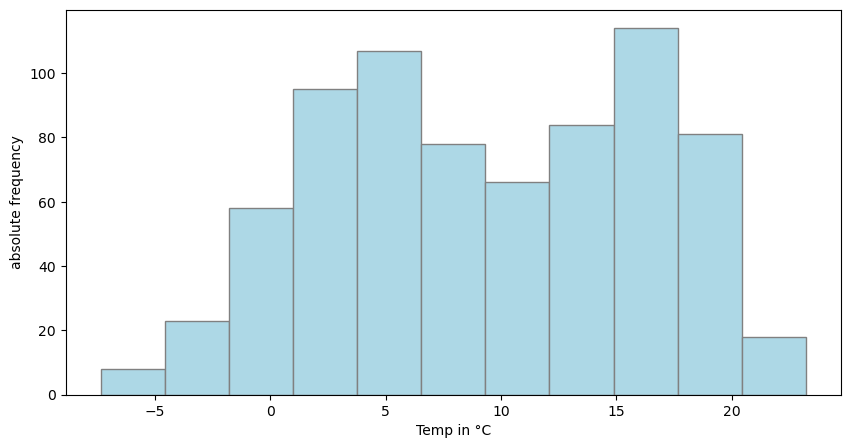

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(dahlem_clim.MO_TT, bins="sturges", color="lightblue", edgecolor="grey")
plt.xlabel("Temp in °C")
plt.ylabel("absolute frequency")
plt.show()

Ok, looks Bimodal! But there seems to be no normal distribution.....

### 1.3. Checking the mean and standard deviation for this subset

Check for normality of the monthly mean temperature with the help of a qqplot!

##### solution

<Figure size 1200x500 with 0 Axes>

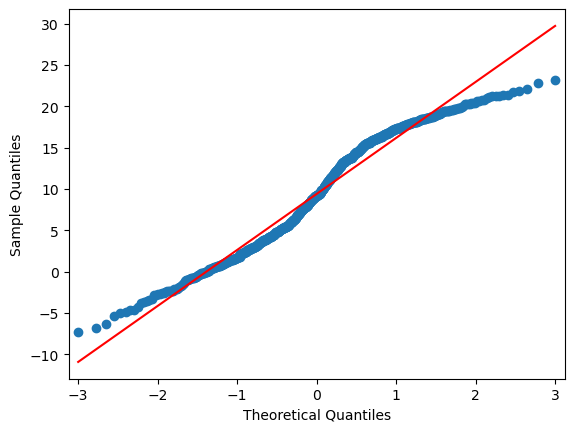

In [8]:
import statsmodels.api as sm

plt.figure(figsize=(12, 5))
sm.qqplot(dahlem_clim.MO_TT, line="r")

plt.show()

Well, we already suspected something like this.... Lets have a closer look: 

### 1.4. Slicing the data frame
Now, we want to slice the dataset into 2 parts. We want to subset between 1961 to 1990 and from 1991 to today. Subset the entire dataset (not only 1 column as we saw in the seminar)!


##### solution

In [9]:
## combined conditions :

dahlem_1961_1990 = dahlem_clim.loc[
    (dahlem_clim["MESS_DATUM_BEGINN"] >= 19610101)
    & (dahlem_clim["MESS_DATUM_BEGINN"] < 19910101)
]
dahlem_1961_1990

,STATIONS_ID,MESS_DATUM_BEGINN,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
2778,403,19610101,19610131,5,5.01,-1.02,1.31,-3.88,2.63,7.8,-999.0,-16.2,71.5,5,50.4,7.4,eor
2779,403,19610201,19610228,5,6.12,4.66,7.98,1.56,2.56,15.5,-999.0,-4.7,61.4,5,41.9,7.6,eor
2780,403,19610301,19610331,5,5.58,6.79,10.79,3.15,3.02,19.4,-999.0,-3.7,124.1,5,52.9,18.6,eor
2781,403,19610401,19610430,5,4.88,11.38,16.61,6.24,2.40,26.1,-999.0,-0.9,192.7,5,55.7,13.3,eor
2782,403,19610501,19610531,5,6.11,11.23,15.54,7.18,2.29,23.8,-999.0,3.0,132.8,5,120.1,26.7,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,403,19900801,19900831,10,4.05,18.75,24.83,13.61,1.80,32.0,17.4,7.5,253.7,10,74.7,25.2,eor
3134,403,19900901,19900930,10,5.79,12.27,16.55,9.25,2.13,21.7,23.1,4.8,114.0,10,52.4,8.6,eor
3135,403,19901001,19901031,10,4.10,10.52,15.35,6.74,2.18,23.1,16.9,0.3,157.7,10,9.8,4.3,eor
3136,403,19901101,19901130,10,6.55,5.26,7.40,3.16,2.01,12.1,18.0,-2.4,47.3,10,56.6,16.4,eor


In [10]:
## combined conditions:

dahlem_1990_today = dahlem_clim.loc[dahlem_clim["MESS_DATUM_BEGINN"] >= 19910101]
dahlem_1990_today

,STATIONS_ID,MESS_DATUM_BEGINN,MESS_DATUM_ENDE,QN_4,MO_N,MO_TT,MO_TX,MO_TN,MO_FK,MX_TX,MX_FX,MX_TN,MO_SD_S,QN_6,MO_RR,MX_RS,eor
3138,403,19910101,19910131,10,4.97,2.30,4.57,0.07,2.16,15.2,18.5,-8.7,76.20,9,27.6,13.7,eor
3139,403,19910201,19910228,10,5.27,-2.34,0.85,-5.32,1.84,12.9,14.9,-12.9,72.40,9,27.1,7.9,eor
3140,403,19910301,19910331,10,4.79,6.77,11.30,3.25,2.15,18.1,14.4,-1.2,128.30,9,40.8,19.0,eor
3141,403,19910401,19910430,10,4.80,8.23,13.28,3.32,2.02,20.5,20.0,-2.8,174.80,9,40.4,7.8,eor
3142,403,19910501,19910531,10,4.97,10.52,14.90,5.90,2.19,24.2,24.1,1.2,179.60,9,38.6,15.5,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,403,20210801,20210831,3,5.67,17.43,22.34,12.97,2.42,29.4,16.9,8.0,188.23,3,92.4,22.6,eor
3506,403,20210901,20210930,3,4.90,15.55,20.28,11.35,2.33,27.3,18.6,6.8,154.48,3,35.1,15.9,eor
3507,403,20211001,20211031,3,4.85,10.49,15.28,6.29,2.81,24.2,25.6,0.5,157.65,3,21.8,5.7,eor
3508,403,20211101,20211130,3,6.65,6.28,8.68,3.87,2.60,12.7,18.6,-0.9,41.23,3,65.2,40.4,eor


### 1.5. Checking for Normality


Calculate the mean and standard deviation for the monthly mean temperature for both dataframes! Doe they violate the three sigma rule? plot the distriubtion as histogram and density plot. 
Check for normality of the monthly mean temperature with the help of a qqplot! (solution the same as above)

### 1.6. Boxplots

Let's have a closer look at both dataframes with the help of a boxplot! Plot both datasets next to eachother in two boxplots but one figure frame.


##### solution

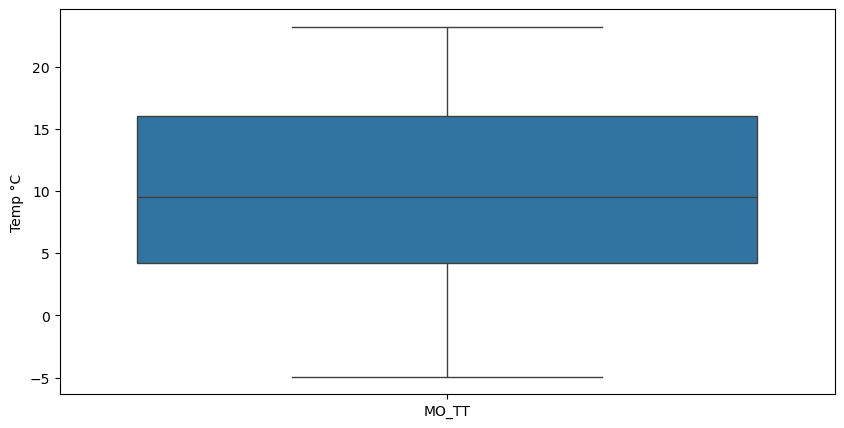

In [11]:
fig = plt.figure(figsize=(10, 5))

sns.boxplot(data=[dahlem_1961_1990["MO_TT"], dahlem_1990_today["MO_TT"]])

plt.ylabel("Temp °C")
plt.show()

#### Which argument to we have to add, if we want to find significant differences between the groups? Is there a signifanct difference in the monthly mean temperature between 1961 to 1991 and from 1991 to today?

##### solution

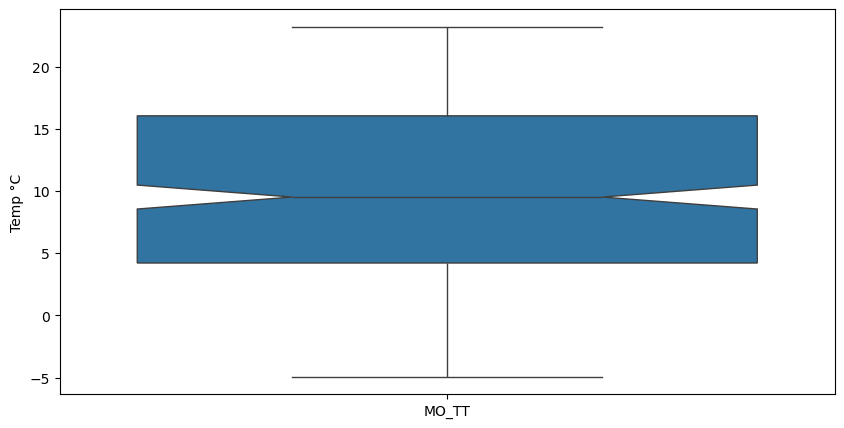

In [12]:
fig = plt.figure(figsize=(10, 5))

sns.boxplot(data=[dahlem_1961_1990["MO_TT"], dahlem_1990_today["MO_TT"]], notch=True)

plt.ylabel("Temp °C")
plt.show()

Looks pretty similiar

In [13]:
from IPython.display import IFrame

IFrame(
    src="../../../citation_Marie.html",
    width=900,
    height=200,
)